# Time series

* timestamp : 시간 내 특정 순간
* period : 1년, 1월간, 주간, 분기등 
* interval : 시작~끝 
* elapsed (experiment) time : 이동시간, 사용시간 특정 시작시가에 대한 상대적 시간 측정값
* epoch : reference time 

https://docs.python.org/3/library/datetime.html

- datetime : date 와 time 이 같이 있음 (주로 사용)
- timedelta : 변화량 
- timezone : tzinfo 의 구체화 


In [1]:
from __future__ import division
from pandas import Series, DataFrame
import pandas as pd
from numpy.random import randn
import numpy as np
pd.options.display.max_rows = 12
np.set_printoptions(precision=4, suppress=True)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 4))

In [2]:
%matplotlib inline

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [13]:
# datetime 안에 들어 있는 datetime 모듈 위와 다른 모듈이 import 된다. 
#from datetime import datetime 

import datetime
datetime.MINYEAR
datetime.MAXYEAR
datetime

1

9999

<module 'datetime' from 'C:\\Anaconda3\\lib\\datetime.py'>

## Date and Time Data Types and Tools

In [14]:
# 현재 시간 구하기 
from datetime import datetime
now = datetime.now()
now

datetime.datetime(2017, 9, 13, 10, 19, 43, 594065)

In [6]:
now.year, now.month, now.day # , 로 구분하면 tuple 로 출력
now.hour, now.minute, now.second, now.microsecond

(2017, 9, 12)

(10, 32, 50, 752147)

In [9]:
10
10,

10

(10,)

In [10]:
datetime.today() # now 랑 비슷하나 timezone 에 영향을 받음 local date time 

datetime.datetime(2017, 9, 12, 10, 37, 1, 250426)

In [12]:
# timedelta 를 직접 만듬 
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta
delta.days
delta.seconds
delta.microseconds

datetime.timedelta(926, 56700)

926

56700

0

In [13]:
# timedelta 사용
from datetime import timedelta
start = datetime(2011, 1, 7)
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [14]:
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

### Converting between string and datetime

날짜 <-> 문자열 변환 

datetime.strftime('포맷규칙')

http://strftime.org/

| Code | Meaning                                                       | Example  |
|:-----|:-------------------------------------------------------------|:---------|
| %y   | Year without century as a zero-padded decimal number.         | 13       |
| %Y   | Year with century as a decimal number.                        | 2013     |
| %m   | Month as a zero-padded decimal number.                        | 09       |
| %-m  | Month as a decimal number. (Platform specific)                | 9        |
| %H   | Hour (24-hour clock) as a zero-padded decimal number.         | 07       |
| %-H  | Hour (24-hour clock) as a decimal number. (Platform specific) | 7        |
| %I   | Hour (12-hour clock) as a zero-padded decimal number.         | 07       |
| %-I  | Hour (12-hour clock) as a decimal number. (Platform specific) | 7        |
| %p   | Locale’s equivalent of either AM or PM.                       | AM       |
| %M   | Minute as a zero-padded decimal number.                       | 06       |
| %-M  | Minute as a decimal number. (Platform specific)               | 6        |
| %S   | Second as a zero-padded decimal number.                       | 05       |
| %-S  | Second as a decimal number. (Platform specific)               | 5        |
| %D   | %m/%d/%y simple expression                                    | 04/18/12 |
| %F   | %Y-%m-%d simple expression                                    | 2012-4-18|




* datetime -> 문자열 

In [15]:
stamp = datetime(2011, 1, 3)
str(stamp)

'2011-01-03 00:00:00'

In [16]:
# 캐스팅 
stamp.strftime('%Y-%m-%d')

'2011-01-03'

* 문자열 -> datetime

In [23]:
value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d').strftime("%m/%d/%Y")

'01/03/2011'

In [18]:
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs] # list comprehension

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

* dateutil 패키지 대부분의 날짜 표현 방식 파싱 가능 

In [19]:
from dateutil.parser import parse
parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [20]:
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

* 월이 앞에 오는 경우 dayfirst=True

In [21]:
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

* pandas.to_datetime() input 값에 따라 return 형이 다름 
    - 단일 날짜 : timestamp 형으로 변환
    - 날짜의 배열 : pandas.DatetimeIndex

In [24]:
pd.to_datetime('2011-12-10')
datestrs
pd.to_datetime(datestrs)
# note: output changed (no '00:00:00' anymore)

Timestamp('2011-12-10 00:00:00')

['7/6/2011', '8/6/2011']

DatetimeIndex(['2011-07-06', '2011-08-06'], dtype='datetime64[ns]', freq=None)

* 누락된 날짜 처리 

In [25]:
idx = pd.to_datetime(datestrs + [None]) # NaT 값이 됨 
idx 

DatetimeIndex(['2011-07-06', '2011-08-06', 'NaT'], dtype='datetime64[ns]', freq=None)

In [26]:
idx[2]

NaT

In [27]:
pd.isnull(idx)

array([False, False,  True], dtype=bool)

## Time Series Basics

* pandas 시간 데이터 타입
    - timestamp : to_datetime, Timestamp 
    - DatetimeIndex : to_datetime, date_range, DatetimeIndex
    - Period : Period 
    - PeriodIndex : period_range, PeriodIndex
    
* 시계열 데이터  
    - 파이썬 문자열 또는 datetime 객체로 표현되는 Timestamp 인덱스의 Series 객체 
    - datetime 객체의 경우 Timestamp 타입으로 자동변환되나 정렬 되지 않음 

In [30]:
from datetime import datetime
dates = [datetime(2011, 1, 2), datetime(2011, 1, 5), datetime(2011, 1, 7),
         datetime(2011, 1, 8), datetime(2011, 1, 10), datetime(2011, 1, 1)]
dates
# index 인자로 입려된 datetime 리스트가 자동으로 DatetimeIndex 객체로 변환
ts = Series(np.random.randint(6, size=6), index=dates) 
ts # 정렬 X

[datetime.datetime(2011, 1, 2, 0, 0),
 datetime.datetime(2011, 1, 5, 0, 0),
 datetime.datetime(2011, 1, 7, 0, 0),
 datetime.datetime(2011, 1, 8, 0, 0),
 datetime.datetime(2011, 1, 10, 0, 0),
 datetime.datetime(2011, 1, 1, 0, 0)]

2011-01-02    0
2011-01-05    5
2011-01-07    1
2011-01-08    2
2011-01-10    5
2011-01-01    3
dtype: int32

In [32]:
type(ts)
# note: output changed to "pandas.core.series.Series"
ts.index

pandas.core.series.Series

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-01'],
              dtype='datetime64[ns]', freq=None)

In [39]:
ts
ts[::2]
ts + ts[::2]

2011-01-02    0
2011-01-05    5
2011-01-07    1
2011-01-08    2
2011-01-10    5
2011-01-01    3
dtype: int32

2011-01-02    0
2011-01-07    1
2011-01-10    5
dtype: int32

2011-01-01     NaN
2011-01-02     0.0
2011-01-05     NaN
2011-01-07     2.0
2011-01-08     NaN
2011-01-10    10.0
dtype: float64

* DatetimeIndex 의 스칼라 값은 pandas 의 Timestamp 객체 

In [37]:
# index 인자로 날짜 문자열의 리스트를 대입하는 경우 
da = ['2017-9-1', '2017-9-3','2017-9-5', '2017-3-1', '2017-2-1']
ts2 = Series(np.random.randn(5), index = da)
ts2
type(ts2.index)

2017-9-1   -0.323509
2017-9-3    0.866287
2017-9-5   -0.740327
2017-3-1    0.643041
2017-2-1   -0.084039
dtype: float64

pandas.core.indexes.base.Index

* timestamp 의 정밀도 : 나노초 (ns)

In [34]:
ts.index.dtype
# note: output changed from dtype('datetime64[ns]') to dtype('<M8[ns]')

dtype('<M8[ns]')

In [35]:
stamp = ts.index[0]
stamp
# note: output changed from <Timestamp: 2011-01-02 00:00:00> to Timestamp('2011-01-02 00:00:00')

Timestamp('2011-01-02 00:00:00')

### Indexing, selection, subsetting

하나의 값 접근하기 
- timestamp 객체 
- 문자열 (시계열 데이터의 인덱스가 정렬되어 있지 않으면 Series 객체 반환)
- datetime 객체 

In [42]:
ts
stamp = ts.index[2]
stamp
ts[stamp] # scala value

# Series (정렬되어 있는 경우 scala value 값이 나옴)
ts['1/10/2011'] 
ts['1-7/2011']
ts['20110110']

ts[datetime(2011, 1, 7)] # scala value

2011-01-02    0
2011-01-05    5
2011-01-07    1
2011-01-08    2
2011-01-10    5
2011-01-01    3
dtype: int32

Timestamp('2011-01-07 00:00:00')

1

2011-01-10    5
dtype: int32

2011-01-07    1
dtype: int32

2011-01-10    5
dtype: int32

1

* 년 또는 월만 으로 해당 기간의 데이터 선택 

In [44]:
# date_range 하루씩 Freq: D (기본값) periods 1000 개 만큼 만듬 
longer_ts = Series(np.random.randn(1000),
                   index=pd.date_range('8/1/2017', periods=1000))
longer_ts

2017-08-01    0.209029
2017-08-02   -0.179249
2017-08-03    0.605462
2017-08-04   -1.350014
2017-08-05   -0.735878
2017-08-06   -0.023796
                ...   
2020-04-21   -0.234765
2020-04-22   -1.404532
2020-04-23   -0.344871
2020-04-24    0.374335
2020-04-25   -1.981032
2020-04-26   -0.051354
Freq: D, Length: 1000, dtype: float64

In [45]:
longer_ts['2017']

2017-08-01    0.209029
2017-08-02   -0.179249
2017-08-03    0.605462
2017-08-04   -1.350014
2017-08-05   -0.735878
2017-08-06   -0.023796
                ...   
2017-12-26    0.538524
2017-12-27   -0.368901
2017-12-28   -0.284931
2017-12-29    0.245828
2017-12-30    0.739525
2017-12-31   -0.534199
Freq: D, Length: 153, dtype: float64

In [47]:
longer_ts['2017-12']

2017-12-01   -0.736123
2017-12-02    0.325840
2017-12-03   -1.243094
2017-12-04    0.421158
2017-12-05    0.535501
2017-12-06   -2.098898
                ...   
2017-12-26    0.538524
2017-12-27   -0.368901
2017-12-28   -0.284931
2017-12-29    0.245828
2017-12-30    0.739525
2017-12-31   -0.534199
Freq: D, Length: 31, dtype: float64

* 날짜로 데이터 자르기 

    원본 시계열 데이터에 대한 뷰 생성 

In [57]:
ts
ts[datetime(2011, 1, 7):]

2011-01-02    0
2011-01-05    5
2011-01-07    1
2011-01-08    2
2011-01-10    5
2011-01-01    3
dtype: int32

2011-01-07    1
2011-01-08    2
2011-01-10    5
2011-01-01    3
dtype: int32

In [59]:
ts['1/6/2011':'1/10/2011'] # 뒷 날짜가 포함됨 label 로 동작함 

2011-01-07    1
2011-01-08    2
2011-01-10    5
dtype: int32

* 시계열 데이터를 특정 날짜 기준으로 앞 또는 뒤 버리기 
    - 특정 날짜는 포함됨 

In [62]:
ts
ts.truncate(after='1/8/2011')
ts.truncate(before='1/8/2011')

2011-01-02    0
2011-01-05    5
2011-01-07    1
2011-01-08    2
2011-01-10    5
2011-01-01    3
dtype: int32

2011-01-02    0
2011-01-05    5
2011-01-07    1
2011-01-08    2
dtype: int32

2011-01-08    2
2011-01-10    5
2011-01-01    3
dtype: int32

* 시계열 데이터 접근 (indexing) (데이터프레임에도 동일하게 적용)
    - row 인덱스 적용 

In [67]:
# freq='W-WED' 매주 수요일로 100개 만들어짐 
dates = pd.date_range('1/1/2017', periods=100, freq='W-WED') 
long_df = DataFrame(np.random.randint(100, size=(100, 4)),
                    index=dates,
                    columns=['Colorado', 'Texas', 'New York', 'Ohio'])
long_df.loc['9-2017']

,Colorado,Texas,New York,Ohio
2017-09-06,45,95,7,95
2017-09-13,31,65,94,80
2017-09-20,8,57,14,7
2017-09-27,19,43,43,52


### Time series with duplicate indices

In [106]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000', '1/2/2000',
                          '1/3/2000'])
dates
dup_ts = Series(np.arange(5), index=dates)
dup_ts

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-02', '2000-01-02',
               '2000-01-03'],
              dtype='datetime64[ns]', freq=None)

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

* 시계열 데이터 인덱스의 유일 여부 확인 

In [78]:
dup_ts.index.is_unique

False

* 시계열 데이터 접근
    - 인덱스가 유일 O > 스칼라
    - 인덱스가 유일 X > 시계열 

In [79]:
dup_ts['1/3/2000']  # not duplicated

4

In [80]:
dup_ts['1/2/2000']  # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

* Timestamp 인덱스로 그룹지어서 집계 

In [81]:
grouped = dup_ts.groupby(level=0)
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

In [88]:
grouped.count() 
dup_ts.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

5

## Date ranges, Frequencies, and Shifting
날짜 범위 빈도

* 시간이 불규칙적인 시계열 -> 고정 빈도 시계열 (1일씩, 1주일씩...) 로 변환하는 방식
    - resample API 가 좀 더 groupby 처럼 변경 됨 (v0.18.0)
    - asfreq() 빈도가 변경된 시계열을 반환
    - DateOffset object <br> 
        https://pandas.pydata.org/pandas-docs/stable/timeseries.html#offset-aliases
    - Frequency Strings (Offset aliase)

In [89]:
ts

2011-01-02    0
2011-01-05    5
2011-01-07    1
2011-01-08    2
2011-01-10    5
2011-01-01    3
dtype: int32

In [92]:
ts.resample('D') # 객체 반환으로 변경됨 
ts.resample('D').asfreq()

DatetimeIndexResampler [freq=<Day>, axis=0, closed=left, label=left, convention=start, base=0]

2011-01-01    3.0
2011-01-02    0.0
2011-01-03    NaN
2011-01-04    NaN
2011-01-05    5.0
2011-01-06    NaN
2011-01-07    1.0
2011-01-08    2.0
2011-01-09    NaN
2011-01-10    5.0
Freq: D, dtype: float64

In [94]:
ts.resample('D').sum()
ts.resample('3d').sum() 
# 3일에 한번씩 (원래 있던 데이터의 범위를 벗어나진 않음)

2011-01-01    3.0
2011-01-02    0.0
2011-01-03    NaN
2011-01-04    NaN
2011-01-05    5.0
2011-01-06    NaN
2011-01-07    1.0
2011-01-08    2.0
2011-01-09    NaN
2011-01-10    5.0
Freq: D, dtype: float64

2011-01-01    3
2011-01-04    5
2011-01-07    3
2011-01-10    5
Freq: 3D, dtype: int32

### Generating date ranges


In [95]:
index = pd.date_range('4/1/2012', '6/1/2012')
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

In [96]:
pd.date_range(start='4/1/2012', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [97]:
pd.date_range(end='6/1/2012', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

* 매월 마지막 영업일 포함

In [98]:
pd.date_range('1/1/2017', '12/1/2017', freq='BMS') # 일 시작일 
pd.date_range('1/1/2017', '12/1/2017', freq='BM')

DatetimeIndex(['2017-01-02', '2017-02-01', '2017-03-01', '2017-04-03',
               '2017-05-01', '2017-06-01', '2017-07-03', '2017-08-01',
               '2017-09-01', '2017-10-02', '2017-11-01', '2017-12-01'],
              dtype='datetime64[ns]', freq='BMS')

DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-28',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-29', '2017-10-31', '2017-11-30'],
              dtype='datetime64[ns]', freq='BM')

In [99]:
pd.date_range('5/2/2012 12:56:31', periods=5) # 시분초 유지됨

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

* 자정에 맞춰 타임스탬프 정규화(normalization)
    - start, end 날짜를 자정으로 정규화 한 후 date range 실행 

In [102]:
pd.date_range('5/2/2012 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### Frequencies and Date Offsets
빈도 DataOffset Object 

In [103]:
from pandas.tseries.offsets import Hour, Minute
hour = Hour()
hour

<Hour>

In [104]:
four_hours = Hour(4)
four_hours

<4 * Hours>

* 간단한 문자열의 형태로 사용 

In [107]:
pd.date_range('1/1/2000', '1/3/2000 23:59', freq='4h')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [109]:
Hour(2) + Minute(30)

<150 * Minutes>

In [110]:
pd.date_range('1/1/2000', periods=10, freq='1h30min') # 1H30T

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

* Anchored Offset <br>
D, B, H, U, M, 외에 W-MON, Q-JAN, ... 같은 것들 매주 월요일, 분기 2월부터 시작해서 다음1월 끝 

닻을 내리다. 기준월을 변경하다. 


#### Week of month dates

In [11]:
# 매월 셋째 주 금요일 
rng = pd.date_range('1/1/2017', '9/1/2017', freq='WOM-3FRI')
list(rng)
pd.date_range('1/1/2017', '10/1/2017', freq='3W-FRI')
pd.date_range('2017-09-13', periods=10, freq='3W') # endofday week 9월 13일이 들어 있는 일요일 

[Timestamp('2017-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2017-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2017-03-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2017-04-21 00:00:00', freq='WOM-3FRI'),
 Timestamp('2017-05-19 00:00:00', freq='WOM-3FRI'),
 Timestamp('2017-06-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2017-07-21 00:00:00', freq='WOM-3FRI'),
 Timestamp('2017-08-18 00:00:00', freq='WOM-3FRI')]

DatetimeIndex(['2017-01-06', '2017-01-27', '2017-02-17', '2017-03-10',
               '2017-03-31', '2017-04-21', '2017-05-12', '2017-06-02',
               '2017-06-23', '2017-07-14', '2017-08-04', '2017-08-25',
               '2017-09-15'],
              dtype='datetime64[ns]', freq='3W-FRI')

DatetimeIndex(['2017-09-17', '2017-10-08', '2017-10-29', '2017-11-19',
               '2017-12-10', '2017-12-31', '2018-01-21', '2018-02-11',
               '2018-03-04', '2018-03-25'],
              dtype='datetime64[ns]', freq='3W-SUN')

### Shifting (leading and lagging) data

In [112]:
ts = Series(np.random.randn(4),
            index=pd.date_range('9/1/2017', periods=4, freq='M'))
ts

2017-09-30   -0.447340
2017-10-31    0.558983
2017-11-30   -0.505632
2017-12-31    0.781293
Freq: M, dtype: float64

* 느슨한 시프트 
    - 시간인덱스는 그대로, 데이터만 이동
    - 데이터가 버려질 수 있음 

In [113]:
ts
ts.shift(2)
ts.shift(-2)

2017-09-30   -0.447340
2017-10-31    0.558983
2017-11-30   -0.505632
2017-12-31    0.781293
Freq: M, dtype: float64

2017-09-30         NaN
2017-10-31         NaN
2017-11-30   -0.447340
2017-12-31    0.558983
Freq: M, dtype: float64

2017-09-30   -0.505632
2017-10-31    0.781293
2017-11-30         NaN
2017-12-31         NaN
Freq: M, dtype: float64

* 시계열에서 퍼센트 계산 

In [115]:
# 이전값보다 얼마나 늘었나 증가분 구하기 
ts.shift(1)
ts / ts.shift(1) - 1 

2017-09-30         NaN
2017-10-31   -0.447340
2017-11-30    0.558983
2017-12-31   -0.505632
Freq: M, dtype: float64

2017-09-30         NaN
2017-10-31   -2.249570
2017-11-30   -1.904558
2017-12-31   -2.545181
Freq: M, dtype: float64

In [117]:
ts.pct_change()
ts.pct_change(2)

2017-09-30         NaN
2017-10-31   -2.249570
2017-11-30   -1.904558
2017-12-31   -2.545181
Freq: M, dtype: float64

2017-09-30         NaN
2017-10-31         NaN
2017-11-30    0.130308
2017-12-31    0.397705
Freq: M, dtype: float64

* freq 인자에 같은 빈도를 주면 인덱스가 변경됨

데이터 개수는 변경 되지 않음 

In [121]:
ts
ts.shift(2, freq='M') # 월말 

2017-09-30   -0.447340
2017-10-31    0.558983
2017-11-30   -0.505632
2017-12-31    0.781293
Freq: M, dtype: float64

2017-11-30   -0.447340
2017-12-31    0.558983
2018-01-31   -0.505632
2018-02-28    0.781293
Freq: M, dtype: float64

In [123]:
ts.shift(3, freq='D') # 3Day 뒤 index 만 바뀜 
ts.shift(1, freq='3D')

2017-10-03   -0.447340
2017-11-03    0.558983
2017-12-03   -0.505632
2018-01-03    0.781293
dtype: float64

2017-10-03   -0.447340
2017-11-03    0.558983
2017-12-03   -0.505632
2018-01-03    0.781293
dtype: float64

In [124]:
ts.shift(1, freq='90T') # 한시간 30분 

2017-09-30 01:30:00   -0.447340
2017-10-31 01:30:00    0.558983
2017-11-30 01:30:00   -0.505632
2017-12-31 01:30:00    0.781293
Freq: M, dtype: float64

#### Shifting dates with offsets

In [15]:
from pandas.tseries.offsets import Day, MonthEnd
now = datetime(2011, 11, 17)
now + 3 * Day()  # offset 으로 자동 형변환

Timestamp('2011-11-20 00:00:00')

In [16]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [17]:
now + MonthEnd(2) # 다음 달의 마지막 날 

Timestamp('2011-12-31 00:00:00')

* rollforward(), rollback()
    
    해당 offset object 의 정수배만큼 입력된 날짜 데이터에 대해 적용 

In [130]:
offset = MonthEnd()
offset.rollforward(now) # 그 달의 마지막날로 불러라 
# == now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [131]:
offset.rollback(now) # 그 전달의 마지막 날 
# == now - MonthEnd()

Timestamp('2011-10-31 00:00:00')

In [132]:
 # 4일에 한번씩 20개 날짜 
ts = Series(np.random.randn(20),
            index=pd.date_range('8/15/2017', periods=20, freq='4d'))
ts
# groupby 에 함수를 주면 index 에 적용됨
# 8월에 해당하는 날짜를 모두 말일로 모음 
ts.groupby(offset.rollforward).mean() 

2017-08-15   -1.083883
2017-08-19    1.113509
2017-08-23   -1.262466
2017-08-27   -1.078262
2017-08-31    0.810657
2017-09-04    1.724010
                ...   
2017-10-10   -0.078966
2017-10-14   -0.250080
2017-10-18    0.391269
2017-10-22    0.006987
2017-10-26   -0.131278
2017-10-30   -0.015484
Freq: 4D, Length: 20, dtype: float64

2017-08-31   -0.300089
2017-09-30    0.135589
2017-10-31    0.005083
dtype: float64

In [133]:
#ts.resample('M', how='mean')
ts.resample('M').mean()

2017-08-31   -0.300089
2017-09-30    0.135589
2017-10-31    0.005083
Freq: M, dtype: float64

## Time Zone Handling

시간대 

DST (일광절약시간, Day Saving Time 서머 타임)<br>
UTC (국제 표준시, Coordinated Universal Time)

* pytz 패키지 <br>
    Olson 시간대 데이터베이스를 기준으로 한, 역사적인 시간대와 현대적인 시간대를 모두 망라하고 있는 라이브러리<br>
    http://www.haruair.com/blog/1759


In [134]:
import pytz
pytz.common_timezones[-5:]

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']

In [137]:
[x for x in pytz.common_timezones if x.startswith('Asia')][:10]
[x for x in pytz.common_timezones if x.endswith('Seoul')]

['Asia/Aden',
 'Asia/Almaty',
 'Asia/Amman',
 'Asia/Anadyr',
 'Asia/Aqtau',
 'Asia/Aqtobe',
 'Asia/Ashgabat',
 'Asia/Atyrau',
 'Asia/Baghdad',
 'Asia/Bahrain']

['Asia/Seoul']

TimeZone 객체 생성 

In [138]:
tz = pytz.timezone('US/Eastern')
tz

<DstTzInfo 'US/Eastern' LMT-1 day, 19:04:00 STD>

### Localization and Conversion
명시 하지 않은 시간대는 None

In [139]:
rng = pd.date_range('3/9/2012 9:30', periods=6, freq='D')
ts = Series(np.random.randn(len(rng)), index=rng)

In [140]:
print(ts.index.tz)

None


* 시간대 지정하여 날짜 범위 생성 

In [141]:
pd.date_range('3/9/2012 9:30', periods=10, freq='D', tz='UTC')

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

* 지정한 시간대로 시계열 변경 
    - 시간대가 없는 시계열 : tz_localize()
    - 시간대가 있는 시계열 : tz_convert() <br>
        시간대가 다른 시계열로 변환

In [142]:
ts
ts_utc = ts.tz_localize('UTC') # 현지화 함 
ts_utc # +00:00 타임존이 들어가있음 

2012-03-09 09:30:00   -1.163573
2012-03-10 09:30:00    0.644063
2012-03-11 09:30:00    1.370397
2012-03-12 09:30:00    0.318063
2012-03-13 09:30:00    0.117571
2012-03-14 09:30:00    1.707761
Freq: D, dtype: float64

2012-03-09 09:30:00+00:00   -1.163573
2012-03-10 09:30:00+00:00    0.644063
2012-03-11 09:30:00+00:00    1.370397
2012-03-12 09:30:00+00:00    0.318063
2012-03-13 09:30:00+00:00    0.117571
2012-03-14 09:30:00+00:00    1.707761
Freq: D, dtype: float64

In [143]:
ts_utc.index

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')

In [144]:
ts_utc.tz_convert('US/Eastern') 
# 미동부 표준시간으로 변경 표준 보다 5시간 정도 느림 

2012-03-09 04:30:00-05:00   -1.163573
2012-03-10 04:30:00-05:00    0.644063
2012-03-11 05:30:00-04:00    1.370397
2012-03-12 05:30:00-04:00    0.318063
2012-03-13 05:30:00-04:00    0.117571
2012-03-14 05:30:00-04:00    1.707761
Freq: D, dtype: float64

In [146]:
# ts 타임존이 없는 데이터 
ts
ts_eastern = ts.tz_localize('US/Eastern')
ts_eastern.tz_convert('UTC')

2012-03-09 09:30:00   -1.163573
2012-03-10 09:30:00    0.644063
2012-03-11 09:30:00    1.370397
2012-03-12 09:30:00    0.318063
2012-03-13 09:30:00    0.117571
2012-03-14 09:30:00    1.707761
Freq: D, dtype: float64

2012-03-09 14:30:00+00:00   -1.163573
2012-03-10 14:30:00+00:00    0.644063
2012-03-11 13:30:00+00:00    1.370397
2012-03-12 13:30:00+00:00    0.318063
2012-03-13 13:30:00+00:00    0.117571
2012-03-14 13:30:00+00:00    1.707761
Freq: D, dtype: float64

In [147]:
ts_eastern.tz_convert('Europe/Berlin')

2012-03-09 15:30:00+01:00   -1.163573
2012-03-10 15:30:00+01:00    0.644063
2012-03-11 14:30:00+01:00    1.370397
2012-03-12 14:30:00+01:00    0.318063
2012-03-13 14:30:00+01:00    0.117571
2012-03-14 14:30:00+01:00    1.707761
Freq: D, dtype: float64

In [148]:
ts.index.tz_localize('Asia/Shanghai')

DatetimeIndex(['2012-03-09 09:30:00+08:00', '2012-03-10 09:30:00+08:00',
               '2012-03-11 09:30:00+08:00', '2012-03-12 09:30:00+08:00',
               '2012-03-13 09:30:00+08:00', '2012-03-14 09:30:00+08:00'],
              dtype='datetime64[ns, Asia/Shanghai]', freq='D')

### Operations with time zone-aware Timestamp objects

시간대를 고려한 Timestamp 객체 다루기 

In [149]:
stamp = pd.Timestamp('2011-03-12 04:00')
stamp_utc = stamp.tz_localize('utc'); stamp_utc
stamp_utc.tz_convert('US/Eastern')
stamp_utc.tz_convert('Asia/Seoul')

Timestamp('2011-03-12 04:00:00+0000', tz='UTC')

Timestamp('2011-03-11 23:00:00-0500', tz='US/Eastern')

Timestamp('2011-03-12 13:00:00+0900', tz='Asia/Seoul')

* timezone 객체 생성시 시간대 지정 

In [150]:
stamp_moscow = pd.Timestamp('2011-03-12 04:00', tz='Europe/Moscow')
stamp_moscow

Timestamp('2011-03-12 04:00:00+0300', tz='Europe/Moscow')

* UNIX epoch (1970년1월1일) 부터 해당시간까지의 나노초 
    - 시간대 변환해도 유지됨
    - 일종의 절대 시간 

In [151]:
stamp_utc.value

1299902400000000000

In [152]:
stamp_utc.tz_convert('US/Eastern').value

1299902400000000000

* 일광절약시간제 고려한 시간 계산 
    - 일광절약시간제 
    - DST 전환 시점 고려

In [153]:
# 30 minutes before DST transition
from pandas.tseries.offsets import Hour
stamp = pd.Timestamp('2012-03-12 01:30', tz='US/Eastern')
stamp

Timestamp('2012-03-12 01:30:00-0400', tz='US/Eastern')

In [154]:
stamp + Hour()

Timestamp('2012-03-12 02:30:00-0400', tz='US/Eastern')

In [155]:
# 90 minutes before DST transition
stamp = pd.Timestamp('2012-11-04 00:30', tz='US/Eastern') 
stamp

Timestamp('2012-11-04 00:30:00-0400', tz='US/Eastern')

In [156]:
# 일광절약시간대가 해지되는 시간 
stamp + 2 * Hour() # 한시간이 늦춰짐 일광절약시간대 

Timestamp('2012-11-04 01:30:00-0500', tz='US/Eastern')

### Operations between different time zones
서로 다른 시간대의 연산 

In [159]:
rng = pd.date_range('3/7/2012 9:30', periods=10, freq='B')
ts = Series(np.random.randn(len(rng)), index=rng)

In [158]:
ts[:7]

2012-03-07 09:30:00   -0.777454
2012-03-08 09:30:00    0.454232
2012-03-09 09:30:00   -2.146196
2012-03-12 09:30:00   -0.299642
2012-03-13 09:30:00   -0.812050
2012-03-14 09:30:00   -2.249181
2012-03-15 09:30:00   -1.319132
Freq: B, dtype: float64

In [160]:
ts1 = ts[:7].tz_localize('Europe/London'); ts1.index
ts2 = ts1[2:].tz_convert('Europe/Moscow'); ts2.index
result = ts1 + ts2 # 표준시로 변환해서 연산됨 
result.index

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, Europe/London]', freq='B')

DatetimeIndex(['2012-03-09 13:30:00+04:00', '2012-03-12 13:30:00+04:00',
               '2012-03-13 13:30:00+04:00', '2012-03-14 13:30:00+04:00',
               '2012-03-15 13:30:00+04:00'],
              dtype='datetime64[ns, Europe/Moscow]', freq='B')

DatetimeIndex(['2012-03-07 09:30:00+00:00', '2012-03-08 09:30:00+00:00',
               '2012-03-09 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='B')

In [161]:
ts1
ts2
result

2012-03-07 09:30:00+00:00   -0.361460
2012-03-08 09:30:00+00:00   -0.411217
2012-03-09 09:30:00+00:00    0.851606
2012-03-12 09:30:00+00:00    0.943031
2012-03-13 09:30:00+00:00    0.192440
2012-03-14 09:30:00+00:00   -2.790647
2012-03-15 09:30:00+00:00   -2.204480
Freq: B, dtype: float64

2012-03-09 13:30:00+04:00    0.851606
2012-03-12 13:30:00+04:00    0.943031
2012-03-13 13:30:00+04:00    0.192440
2012-03-14 13:30:00+04:00   -2.790647
2012-03-15 13:30:00+04:00   -2.204480
Freq: B, dtype: float64

2012-03-07 09:30:00+00:00         NaN
2012-03-08 09:30:00+00:00         NaN
2012-03-09 09:30:00+00:00    1.703213
2012-03-12 09:30:00+00:00    1.886063
2012-03-13 09:30:00+00:00    0.384879
2012-03-14 09:30:00+00:00   -5.581294
2012-03-15 09:30:00+00:00   -4.408960
Freq: B, dtype: float64

## Periods and Period Arithmetic

몇 일, 개월, 분기, 해 

In [168]:
p = pd.Period(2017, freq='A-DEC') # 1년 데이터 annual 
p

Period('2017', 'A-DEC')

In [164]:
p + 5

Period('2022', 'A-DEC')

In [165]:
p - 2

Period('2015', 'A-DEC')

In [169]:
pd.Period('2014', freq='A-DEC') - p

-3

* pandas.period_range() : PeriodIndex 생성 

In [172]:
# 월말 단위로 
rng = pd.period_range('1/1/2017', '6/30/2017', freq='M') 
rng

PeriodIndex(['2017-01', '2017-02', '2017-03', '2017-04', '2017-05', '2017-06'], dtype='period[M]', freq='M')

In [173]:
Series(np.random.randn(6), index=rng)

2017-01    0.902848
2017-02    0.592726
2017-03    1.206913
2017-04    0.024668
2017-05   -0.771201
2017-06   -1.594341
Freq: M, dtype: float64

In [177]:
# Q-DEC 12월을 끝으로 하는 분기 
values = ['2011Q3', '2012Q2', '2013Q1']
index = pd.PeriodIndex(values, freq='Q-DEC')
index

PeriodIndex(['2011Q3', '2012Q2', '2013Q1'], dtype='period[Q-DEC]', freq='Q-DEC')

### Period Frequency Conversion

Period.asfreq() 

* 상위 단계 기간 => 하위 단계 기간 

In [184]:
p = pd.Period('2007', freq='A-DEC') # 1년단위
p.asfreq('M', how='start') # 월 단위 start 로 바꿈 (더 작게)
p.asfreq('M', how='end')
p.asfreq('D', how='start')
p.asfreq('D', how='end')
p.asfreq('H', how='start')
p.asfreq('H', how='end')

Period('2007-01', 'M')

Period('2007-12', 'M')

Period('2007-01-01', 'D')

Period('2007-12-31', 'D')

Period('2007-01-01 00:00', 'H')

Period('2007-12-31 23:00', 'H')

In [183]:
p = pd.Period('2007', freq='A-JUN') # JUN
p.asfreq('M', 'start')
p.asfreq('M', 'end')

Period('2006-07', 'M')

Period('2007-06', 'M')

* 하위 단계 기간 => 상위 단계 기간 (큰 범위로)

    상위 기간은 하위 기간이 어디 속했는지에 따라 결정

In [186]:
p = pd.Period('Aug-2007', 'M');p
p.asfreq('A-JUN') # JUN 7월1일부터 12월31일 

Period('2007-08', 'M')

Period('2008', 'A-JUN')

* PeriodIndex 객체 다루기 

In [187]:
# start, end, period 
rng = pd.period_range('2006', '2009', freq='A-DEC') 
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2006    1.868900
2007    1.698212
2008   -1.041540
2009   -0.481870
Freq: A-DEC, dtype: float64

In [188]:
# 년간 데이터를 월간 데이터로 변경 
ts.asfreq('M', how='start') 

2006-01    1.868900
2007-01    1.698212
2008-01   -1.041540
2009-01   -0.481870
Freq: M, dtype: float64

In [189]:
ts.asfreq('B', how='end') # 날짜까지 출력됨 (비즈니스데이)

2006-12-29    1.868900
2007-12-31    1.698212
2008-12-31   -1.041540
2009-12-31   -0.481870
Freq: B, dtype: float64

### Quarterly period frequencies

* 회계 연도의 끝에 따라 의미가 달라짐
* 12 가지의 분기 빈도 : Q-JAN ~ Q-DEC

In [192]:
p = pd.Period('2017Q3', freq='Q-DEC') # 3 달치 
p
p2 = pd.Period('2017Q3', freq='q-jan')
p2

Period('2017Q3', 'Q-DEC')

Period('2017Q3', 'Q-JAN')

In [193]:
p.asfreq('D', 'start')
p2.asfreq('D', 'S') # 's' FMA/MJJ/ASO/NDJ(2017) 
# 2017년 1월에 끝나는 분기 2016년 2월부터 시작 3개월씩 

Period('2017-07-01', 'D')

Period('2016-08-01', 'D')

In [194]:
p.asfreq('D', 'end')
p2.asfreq('D', 'e')

Period('2017-09-30', 'D')

Period('2016-10-31', 'D')

* 2017년 3분기영업 마감일 오후 4시 

In [200]:
p
p.asfreq('B', 'e') # 영업일 마지막 마감일 
(p.asfreq('B', 'e') - 1).asfreq('T', 's') # 분으로 변환 (도메인..-1)

Period('2017Q3', 'Q-DEC')

Period('2017-09-29', 'B')

Period('2017-09-28 00:00', 'T')

In [202]:
p4pm = (p.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
p4pm

Period('2017-09-28 16:00', 'T')

In [203]:
p4pm.to_timestamp()

Timestamp('2017-09-28 16:00:00')

* pandas.period_range() 를 이용한 분기 범위 만들기 

In [204]:
rng = pd.period_range('2016Q3', '2017Q4', freq='Q-JAN') # 분기 끝이 1월 
ts = Series(np.arange(len(rng)), index=rng)
ts

2016Q3    0
2016Q4    1
2017Q1    2
2017Q2    3
2017Q3    4
2017Q4    5
Freq: Q-JAN, dtype: int32

In [205]:
#new_rng = (rng.asfreq('B', 'e') - 1).asfreq('T', 's') + 16 * 60
new_rng = rng.asfreq('B', 'e').asfreq('T', 's') + 16 * 60
ts.index = new_rng.to_timestamp()
ts

2015-10-30 16:00:00    0
2016-01-29 16:00:00    1
2016-04-29 16:00:00    2
2016-07-29 16:00:00    3
2016-10-31 16:00:00    4
2017-01-31 16:00:00    5
Freq: BQ-OCT, dtype: int32

### Converting Timestamps to Periods (and back)

* Timestamp <-> Period
* to_period() <-> to_timestamp()

In [206]:
rng = pd.date_range('1/1/2000', periods=3, freq='M')
ts = Series(randn(3), index=rng)
ts

2000-01-31    0.184660
2000-02-29   -1.706822
2000-03-31    1.692365
Freq: M, dtype: float64

* to_period() 에 의해 변환되는 빈도(freq.) 추정됨 

In [208]:
pts = ts.to_period()
pts

2000-01    0.184660
2000-02   -1.706822
2000-03    1.692365
Freq: M, dtype: float64

* 빈도를 지정할 수 있음 <br>
    (중복된 인덱스가 나올수 있다.)

In [209]:
rng = pd.date_range('1/29/2000', periods=6, freq='D')
ts2 = Series(randn(6), index=rng)
ts2.to_period('M')

2000-01    0.087820
2000-01    1.066144
2000-01   -0.705312
2000-02    0.215824
2000-02    0.379544
2000-02   -1.218493
Freq: M, dtype: float64

In [215]:
pts = ts.to_period()
pts

2000-01    0.184660
2000-02   -1.706822
2000-03    1.692365
Freq: M, dtype: float64

In [217]:
pts
pts.to_timestamp(how='end')

2000-01    0.184660
2000-02   -1.706822
2000-03    1.692365
Freq: M, dtype: float64

2000-01-31    0.184660
2000-02-29   -1.706822
2000-03-31    1.692365
Freq: M, dtype: float64

In [218]:
ts2.to_period('M')
ts2.to_period('M').to_timestamp(how='end')

2000-01    0.087820
2000-01    1.066144
2000-01   -0.705312
2000-02    0.215824
2000-02    0.379544
2000-02   -1.218493
Freq: M, dtype: float64

2000-01-31    0.087820
2000-01-31    1.066144
2000-01-31   -0.705312
2000-02-29    0.215824
2000-02-29    0.379544
2000-02-29   -1.218493
dtype: float64

### Creating a PeriodIndex from arrays

미시경제학 연도와 분기 

In [222]:
data = pd.read_csv('data/ch08/macrodata.csv')
data.head(10)

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19
5,1960.0,2.0,2834.390,1792.9,298.152,460.400,1966.1,29.55,140.2,2.68,5.2,180.671,0.14,2.55
6,1960.0,3.0,2839.022,1785.8,296.375,474.676,1967.8,29.75,140.9,2.36,5.6,181.528,2.70,-0.34
7,1960.0,4.0,2802.616,1788.2,259.764,476.434,1966.6,29.84,141.1,2.29,6.3,182.287,1.21,1.08
8,1961.0,1.0,2819.264,1787.7,266.405,475.854,1984.5,29.81,142.1,2.37,6.8,182.992,-0.40,2.77
9,1961.0,2.0,2872.005,1814.3,286.246,480.328,2014.4,29.92,142.9,2.29,7.0,183.691,1.47,0.81


In [223]:
index = pd.PeriodIndex(year=data.year, quarter=data.quarter, freq='Q-DEC')
index

PeriodIndex(['1959Q1', '1959Q2', '1959Q3', '1959Q4', '1960Q1', '1960Q2',
             '1960Q3', '1960Q4', '1961Q1', '1961Q2',
             ...
             '2007Q2', '2007Q3', '2007Q4', '2008Q1', '2008Q2', '2008Q3',
             '2008Q4', '2009Q1', '2009Q2', '2009Q3'],
            dtype='period[Q-DEC]', length=203, freq='Q-DEC')

In [224]:
data[:5]
data.index = index # index 를 시계열 데이터로 만듬
data.infl

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.0,1.0,2710.349,1707.4,286.898,470.045,1886.9,28.98,139.7,2.82,5.8,177.146,0.00,0.00
1,1959.0,2.0,2778.801,1733.7,310.859,481.301,1919.7,29.15,141.7,3.08,5.1,177.830,2.34,0.74
2,1959.0,3.0,2775.488,1751.8,289.226,491.260,1916.4,29.35,140.5,3.82,5.3,178.657,2.74,1.09
3,1959.0,4.0,2785.204,1753.7,299.356,484.052,1931.3,29.37,140.0,4.33,5.6,179.386,0.27,4.06
4,1960.0,1.0,2847.699,1770.5,331.722,462.199,1955.5,29.54,139.6,3.50,5.2,180.007,2.31,1.19


1959Q1    0.00
1959Q2    2.34
1959Q3    2.74
1959Q4    0.27
1960Q1    2.31
1960Q2    0.14
          ... 
2008Q2    8.53
2008Q3   -3.16
2008Q4   -8.79
2009Q1    0.94
2009Q2    3.37
2009Q3    3.56
Freq: Q-DEC, Name: infl, Length: 203, dtype: float64

## Resampling and Frequency Conversion

* Resampling : 시계열의 빈도를 변경하는 작업
    - 다운샘플링 : 상위빈도 -> 하위빈도
        - 표본을 천천히 뽑겠다
        - 그룹 집계
    - 업샘플링 : 하위빈도 -> 상위빈도
        - 보간 (interpolation) 
    - 사이드 샘플링
        - 같은 분기끼리 등.. 
    
    
* resampling method
    - Series.resample()
    - DataFrame.resample()
    - DataFrameGraoupBy.resample()

In [234]:
rng = pd.date_range('1/1/2000', periods=100, freq='D')
ts = Series(randn(len(rng)), index=rng)
#ts.resample('M', how='mean')
ts
ts.resample('M').mean() # groupby 

2000-01-01    0.401157
2000-01-02   -1.549058
2000-01-03    0.103224
2000-01-04   -0.236944
2000-01-05   -0.120389
2000-01-06    1.052888
                ...   
2000-04-04    0.952209
2000-04-05    0.234384
2000-04-06   -0.310686
2000-04-07    0.086596
2000-04-08    1.198946
2000-04-09   -1.737418
Freq: D, Length: 100, dtype: float64

2000-01-31    0.104546
2000-02-29   -0.104632
2000-03-31    0.481307
2000-04-30    0.050584
Freq: M, dtype: float64

In [229]:
#ts.resample('M', how='mean', kind='period')
ts.resample('M', kind='period').mean()

2000-01    0.213018
2000-02   -0.062789
2000-03   -0.090681
2000-04    0.770998
Freq: M, dtype: float64

### Downsampling

* 샘플링 (표본 추출) 비율을 낮추는 작업
    - 표본을 천천히 뽑음
* 고려사항
    - 간격의 양끝중에서 포함시킬쪽 판단
    - 집계하려는 구간의 레이블의 간격의 시작으로 할지 끝으로 할지 판단

In [235]:
rng = pd.date_range('1/1/2000', periods=12, freq='T')
ts = Series(np.arange(12), index=rng)
ts

2000-01-01 00:00:00     0
2000-01-01 00:01:00     1
2000-01-01 00:02:00     2
2000-01-01 00:03:00     3
2000-01-01 00:04:00     4
2000-01-01 00:05:00     5
2000-01-01 00:06:00     6
2000-01-01 00:07:00     7
2000-01-01 00:08:00     8
2000-01-01 00:09:00     9
2000-01-01 00:10:00    10
2000-01-01 00:11:00    11
Freq: T, dtype: int32

In [237]:
#ts.resample('5min', how='sum')
# note: output changed (as the default changed from closed='right', label='right' to closed='left', label='left'
ts.resample('5min').sum() # 1분을 5분 단위로 00, 05 를 포함할지 안할지 00~04까지

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

In [239]:
# closed 포함 
ts.resample('5min', closed='left').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

In [243]:
ts.resample('5min', closed='left', label='left').sum()
ts.resample('5min', closed='right', label='left').sum()
ts.resample('5min', closed='right', label='right').sum()

2000-01-01 00:00:00    10
2000-01-01 00:05:00    35
2000-01-01 00:10:00    21
Freq: 5T, dtype: int32

1999-12-31 23:55:00     0
2000-01-01 00:00:00    15
2000-01-01 00:05:00    40
2000-01-01 00:10:00    11
Freq: 5T, dtype: int32

2000-01-01 00:00:00     0
2000-01-01 00:05:00    15
2000-01-01 00:10:00    40
2000-01-01 00:15:00    11
Freq: 5T, dtype: int32

In [244]:
# label offset
ts.resample('5min', loffset='-1s').sum()

1999-12-31 23:59:59    10
2000-01-01 00:04:59    35
2000-01-01 00:09:59    21
Freq: 5T, dtype: int32

#### Open-High-Low-Close (OHLC) resampling

시가-고가-저가-종가

In [245]:
#ts.resample('5min', how='ohlc')
# note: output changed because of changed defaults
ts.resample('5min').ohlc()

,open,high,low,close
2000-01-01 00:00:00,0,4,0,4
2000-01-01 00:05:00,5,9,5,9
2000-01-01 00:10:00,10,11,10,11


#### Resampling with GroupBy

groupby 의 lambda 함수는 index 를 연산함 

In [18]:
rng = pd.date_range('1/1/2000', periods=100, freq='D')
ts = Series(np.arange(100), index=rng)
ts
ts.groupby(lambda x: x.month).mean()
ts.resample('M').mean()

2000-01-01     0
2000-01-02     1
2000-01-03     2
2000-01-04     3
2000-01-05     4
2000-01-06     5
              ..
2000-04-04    94
2000-04-05    95
2000-04-06    96
2000-04-07    97
2000-04-08    98
2000-04-09    99
Freq: D, Length: 100, dtype: int32

1    15
2    45
3    75
4    95
dtype: int32

2000-01-31    15
2000-02-29    45
2000-03-31    75
2000-04-30    95
Freq: M, dtype: int32

In [247]:
ts.groupby(lambda x: x.weekday).mean()

0    47.5
1    48.5
2    49.5
3    50.5
4    51.5
5    49.0
6    50.0
dtype: float64

### Upsampling and interpolation

In [256]:
frame = DataFrame(np.random.randn(2, 4),
                  index=pd.date_range('9/1/2017', periods=2, freq='W-WED'),
                  columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame

,Colorado,Texas,New York,Ohio
2017-09-06,-0.149074,-0.761541,-0.975482,0.725660
2017-09-13,0.535267,2.183912,-0.059060,1.716642


* 누락값 발생 (주간을 일간으로 바꿀때)

In [257]:
df_daily = frame.resample('D').asfreq()
df_daily

,Colorado,Texas,New York,Ohio
2017-09-06,-0.149074,-0.761541,-0.975482,0.725660
2017-09-07,NaN,NaN,NaN,NaN
2017-09-08,NaN,NaN,NaN,NaN
2017-09-09,NaN,NaN,NaN,NaN
2017-09-10,NaN,NaN,NaN,NaN
2017-09-11,NaN,NaN,NaN,NaN
2017-09-12,NaN,NaN,NaN,NaN
2017-09-13,0.535267,2.183912,-0.059060,1.716642


* 보간 
    - ffill() 이전 값으로 채우기
    - bfill() 이후 값으로 채우기 

In [258]:
# NaN 값 채우기 
frame.resample('D').ffill()

,Colorado,Texas,New York,Ohio
2017-09-06,-0.149074,-0.761541,-0.975482,0.725660
2017-09-07,-0.149074,-0.761541,-0.975482,0.725660
2017-09-08,-0.149074,-0.761541,-0.975482,0.725660
2017-09-09,-0.149074,-0.761541,-0.975482,0.725660
2017-09-10,-0.149074,-0.761541,-0.975482,0.725660
2017-09-11,-0.149074,-0.761541,-0.975482,0.725660
2017-09-12,-0.149074,-0.761541,-0.975482,0.725660
2017-09-13,0.535267,2.183912,-0.059060,1.716642


In [259]:
#frame.resample('D', fill_method='ffill', limit=2)
frame.resample('D', limit=2).ffill()

,Colorado,Texas,New York,Ohio
2017-09-06,-0.149074,-0.761541,-0.975482,0.725660
2017-09-07,-0.149074,-0.761541,-0.975482,0.725660
2017-09-08,-0.149074,-0.761541,-0.975482,0.725660
2017-09-09,-0.149074,-0.761541,-0.975482,0.725660
2017-09-10,-0.149074,-0.761541,-0.975482,0.725660
2017-09-11,-0.149074,-0.761541,-0.975482,0.725660
2017-09-12,-0.149074,-0.761541,-0.975482,0.725660
2017-09-13,0.535267,2.183912,-0.059060,1.716642


In [260]:
frame.resample('W-THU').asfreq()
frame.resample('W-THU').ffill()
frame.resample('W-THU').bfill()

,Colorado,Texas,New York,Ohio
2017-09-07,NaN,NaN,NaN,NaN
2017-09-14,NaN,NaN,NaN,NaN


,Colorado,Texas,New York,Ohio
2017-09-07,-0.149074,-0.761541,-0.975482,0.725660
2017-09-14,0.535267,2.183912,-0.059060,1.716642


,Colorado,Texas,New York,Ohio
2017-09-07,0.535267,2.183912,-0.05906,1.716642
2017-09-14,NaN,NaN,NaN,NaN


### Resampling with periods

In [21]:
frame = DataFrame(np.random.randn(24, 4),
                  index=pd.period_range('1-2000', '12-2001', freq='M'),
                  columns=['Colorado', 'Texas', 'New York', 'Ohio'])
frame[:5]

,Colorado,Texas,New York,Ohio
2000-01,0.238728,-0.992744,-0.503596,0.109255
2000-02,-1.458038,-0.931936,-1.976057,-1.045384
2000-03,-0.855639,0.111980,1.252464,1.794400
2000-04,-0.244943,0.106999,0.580482,-0.566813
2000-05,-0.093215,-1.287529,-0.626964,-1.135505


In [22]:
annual_frame = frame.resample('A-DEC', how='mean')
annual_frame

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).mean()
  """Entry point for launching an IPython kernel.


,Colorado,Texas,New York,Ohio
2000,-0.690503,-0.330209,-0.241306,-0.501156
2001,0.067046,0.056380,0.425416,0.068831


In [25]:
# Q-DEC: Quarterly, year ending in December
#annual_frame.resample('Q-DEC', fill_method='ffill')
annual_frame.resample('Q-DEC').ffill()
# note: output changed, default value changed from convention='end' to convention='start' + 'start' changed to span-like
# also the following cells

,Colorado,Texas,New York,Ohio
2000Q1,-0.690503,-0.330209,-0.241306,-0.501156
2000Q2,-0.690503,-0.330209,-0.241306,-0.501156
2000Q3,-0.690503,-0.330209,-0.241306,-0.501156
2000Q4,-0.690503,-0.330209,-0.241306,-0.501156
2001Q1,0.067046,0.056380,0.425416,0.068831
2001Q2,0.067046,0.056380,0.425416,0.068831
2001Q3,0.067046,0.056380,0.425416,0.068831
2001Q4,0.067046,0.056380,0.425416,0.068831


In [26]:
annual_frame.resample('Q-DEC', convention='start').ffill()

,Colorado,Texas,New York,Ohio
2000Q1,-0.690503,-0.330209,-0.241306,-0.501156
2000Q2,-0.690503,-0.330209,-0.241306,-0.501156
2000Q3,-0.690503,-0.330209,-0.241306,-0.501156
2000Q4,-0.690503,-0.330209,-0.241306,-0.501156
2001Q1,0.067046,0.056380,0.425416,0.068831
2001Q2,0.067046,0.056380,0.425416,0.068831
2001Q3,0.067046,0.056380,0.425416,0.068831
2001Q4,0.067046,0.056380,0.425416,0.068831


In [27]:
annual_frame.resample('Q-MAR').ffill()

,Colorado,Texas,New York,Ohio
2000Q4,-0.690503,-0.330209,-0.241306,-0.501156
2001Q1,-0.690503,-0.330209,-0.241306,-0.501156
2001Q2,-0.690503,-0.330209,-0.241306,-0.501156
2001Q3,-0.690503,-0.330209,-0.241306,-0.501156
2001Q4,0.067046,0.056380,0.425416,0.068831
2002Q1,0.067046,0.056380,0.425416,0.068831
2002Q2,0.067046,0.056380,0.425416,0.068831
2002Q3,0.067046,0.056380,0.425416,0.068831


## Time series plotting

In [29]:
close_px_all = pd.read_csv('data/ch09/stock_px.csv', parse_dates=True, index_col=0)
close_px = close_px_all[['AAPL', 'MSFT', 'XOM']]
close_px = close_px.resample('B').ffill() # business day ffill(이전값으로채움)
close_px.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2292 entries, 2003-01-02 to 2011-10-14
Freq: B
Data columns (total 3 columns):
AAPL    2292 non-null float64
MSFT    2292 non-null float64
XOM     2292 non-null float64
dtypes: float64(3)
memory usage: 71.6 KB


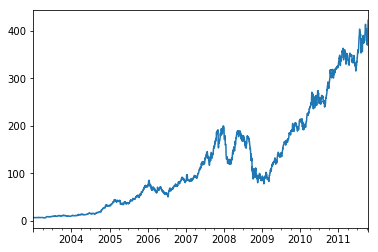

In [30]:
close_px['AAPL'].plot()

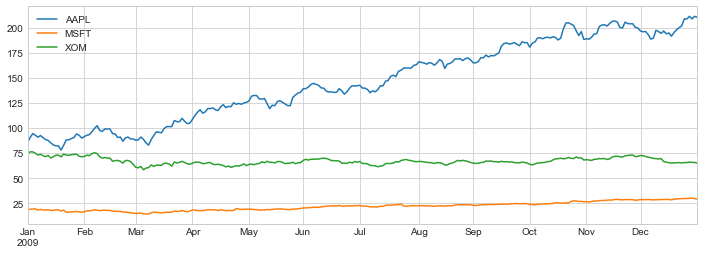

In [31]:
import matplotlib
matplotlib.style.use('seaborn-whitegrid')
plt.rc('figure', figsize=(12, 4))
close_px.loc['2009'].plot();

In [32]:
# close_px.ix['2009'].plot()

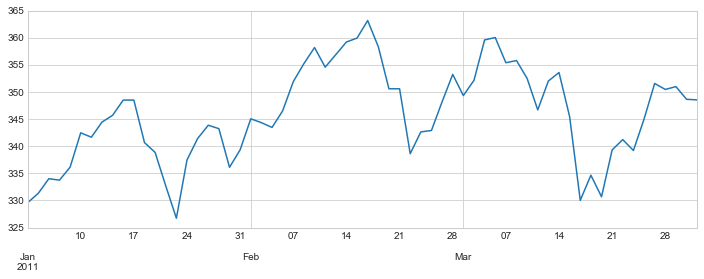

In [33]:
close_px['AAPL'].loc['01-2011':'03-2011'].plot()

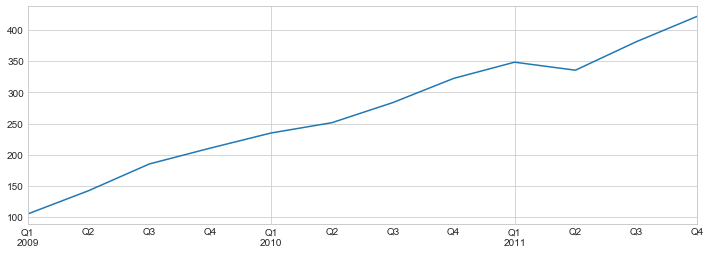

In [35]:
# 분기별 평균 주가 
appl_q = close_px['AAPL'].resample('Q-DEC').ffill()
appl_q.loc['2009':].plot()

## Moving window functions

범위를 가지고 이동하면서 계산 

In [37]:
# 분기를 B 로 바꾸로 null 값을 채움 
close_px = close_px.asfreq('B').fillna(method='ffill')
close_px

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
2003-01-09,7.34,21.93,29.44
...,...,...,...
2011-10-07,369.80,26.25,73.56
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27


* 이동 합계

rolling(3) 창의 크기가 3 적어도 3개 이상의 값이 있어야 나옴 

한칸씩 내려가면서 연산 

In [40]:
df_moving = DataFrame({'moving':np.random.randint(10, size=5)})
df_moving

df_moving.rolling(3).sum()
# 0,1,2 더해서 2에 적고, 1,2,3 더해서 4에 적음 

df_moving.rolling(3, center=True).sum().fillna(0) 
# 값을 중심으로 위아래 1을 중심으로 0, 1, 2 선택됨 

,moving
0,9
1,2
2,5
3,5
4,7


,moving
0,NaN
1,NaN
2,16.0
3,12.0
4,17.0


,moving
0,0.0
1,16.0
2,12.0
3,17.0
4,0.0


* 확장창 함수 (expanding window functions)

창이 이동하는것이 아니라 계속 확장되는 형태 (누적)

In [41]:
df_moving
df_moving.expanding(3).sum() 
# 적어도 3개 이상이 되어야 값이 나옴 

,moving
0,9
1,2
2,5
3,5
4,7


,moving
0,NaN
1,NaN
2,16.0
3,21.0
4,28.0


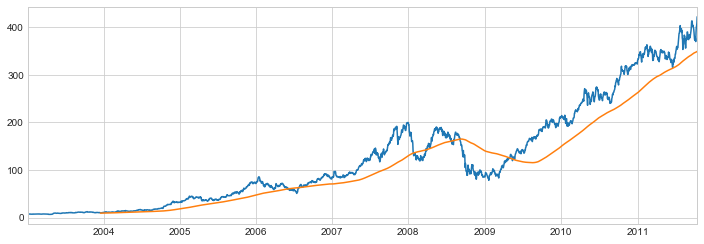

In [42]:
close_px.AAPL.plot()

#pd.rolling_mean(close_px.AAPL, 250).plot()
close_px.AAPL.rolling(window=250).mean().plot()

In [44]:
# 적어도 10개 이상이면 
appl_std250 = close_px.AAPL.rolling(250, min_periods=10).std() 
appl_std250[5:12]

2003-01-09         NaN
2003-01-10         NaN
2003-01-13         NaN
2003-01-14         NaN
2003-01-15    0.077496
2003-01-16    0.074760
2003-01-17    0.112368
Freq: B, Name: AAPL, dtype: float64

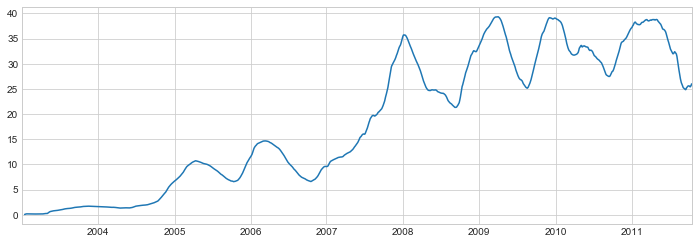

In [45]:
appl_std250.plot()

* 표준 이동창 함수, 표준 확장창 함수, 지수적 가중 이동창 함수 

In [48]:
# Define expanding mean in terms of rolling_mean
# expanding 이 없었다면... len(x) : 창의 크기를 계속 늘려줌 
expanding_mean = lambda x: x.rolling(len(x), min_periods=1).mean()
close_px.apply(expanding_mean)

# 이렇게 하자 
close_px.expanding(3).mean()

,AAPL,MSFT,XOM
2003-01-02,7.400000,21.110000,29.220000
2003-01-03,7.425000,21.125000,29.230000
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
2003-01-09,7.391667,21.490000,29.273333
...,...,...,...
2011-10-07,124.729917,23.946196,59.530717
2011-10-10,124.845337,23.947504,59.538038
2011-10-11,124.965671,23.948838,59.545347


,AAPL,MSFT,XOM
2003-01-02,NaN,NaN,NaN
2003-01-03,NaN,NaN,NaN
2003-01-06,7.433333,21.256667,29.473333
2003-01-07,7.432500,21.425000,29.342500
2003-01-08,7.402000,21.402000,29.240000
2003-01-09,7.391667,21.490000,29.273333
...,...,...,...
2011-10-07,124.729917,23.946196,59.530717
2011-10-10,124.845337,23.947504,59.538038
2011-10-11,124.965671,23.948838,59.545347


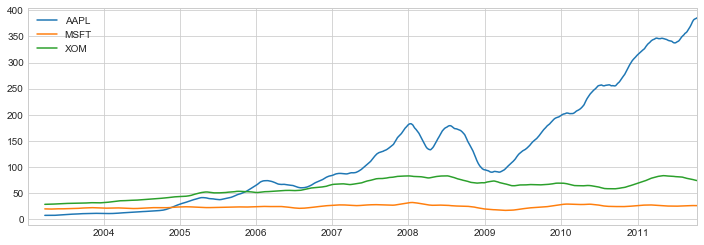

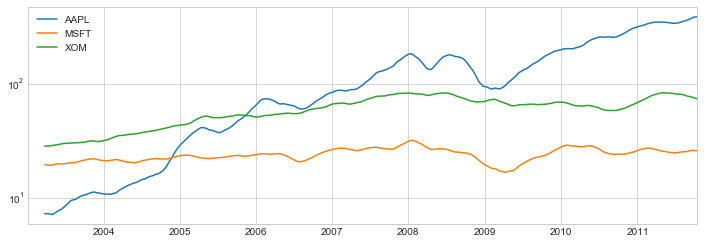

In [52]:
# 주가의 60일 이동평균선 (이전 60일), logy=True log 를 씌움 
close_px.rolling(60).mean().plot()
close_px.rolling(60).mean().plot(logy=True)

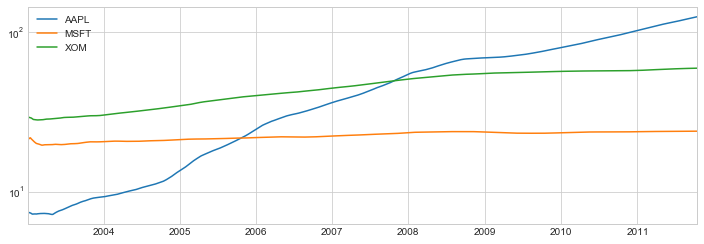

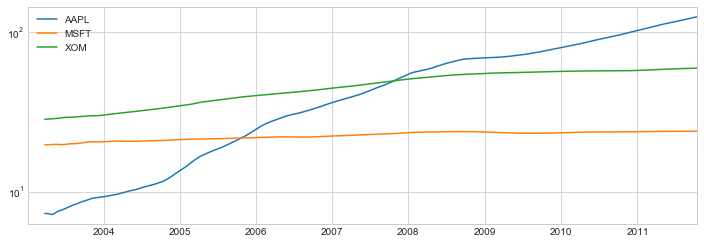

In [53]:
close_px.expanding().mean().plot(logy=True)
close_px.expanding(60).mean().plot(logy=True)

In [54]:
plt.close('all')

### Exponentially-weighted functions

* 최근값에 좀 더 많은 가중치를 두는 방법
* 균등 가중 방식에 비해 좀 더 빠르게 변화를 수용 

선형적이면 값이 작을수록 중요도가 낮아지는데 지수형을 띄면 일정 구간 비슷한 중요도를 갖을 수 있다.

ewm : 지수적 가중치를 줌 주가에 민감하게 반응함 더 빠르게 떨어지고 더 완만해지고...

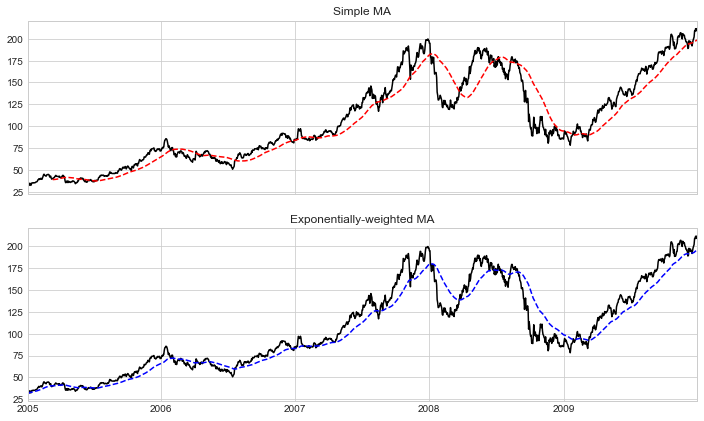

In [56]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, sharey=True,
                         figsize=(12, 7))

aapl_px = close_px.AAPL['2005':'2009']

# ma60 = pd.rolling_mean(aapl_px, 60, min_periods=50)
ma60 = aapl_px.rolling(60, min_periods=50).mean()

# ewma60 = pd.ewma(aapl_px, span=60)
# exponentially weighted moving 
ewma60 = aapl_px.ewm(span=60).mean()

aapl_px.plot(style='k-', ax=axes[0])
ma60.plot(style='r--', ax=axes[0])
aapl_px.plot(style='k-', ax=axes[1])
ewma60.plot(style='b--', ax=axes[1])
axes[0].set_title('Simple MA')
axes[1].set_title('Exponentially-weighted MA')

### Binary moving window functions

두개의 시계열

상관관계, 공분산 등 두 값을 가지고 구해야 하는 경우 사용 

In [57]:
close_px
spx_px = close_px_all['SPX']

,AAPL,MSFT,XOM
2003-01-02,7.40,21.11,29.22
2003-01-03,7.45,21.14,29.24
2003-01-06,7.45,21.52,29.96
2003-01-07,7.43,21.93,28.95
2003-01-08,7.28,21.31,28.83
2003-01-09,7.34,21.93,29.44
...,...,...,...
2011-10-07,369.80,26.25,73.56
2011-10-10,388.81,26.94,76.28
2011-10-11,400.29,27.00,76.27


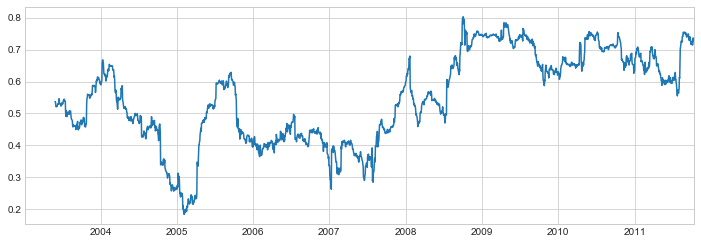

In [58]:
# snp 500 지수에 대한 퍼센트 변화량 
spx_rets = spx_px / spx_px.shift(1) - 1
# 애플의 주가 퍼센트 변화량 
returns = close_px.pct_change()

# 상관 관계 # 우선 100개만 
#corr = pd.rolling_corr(returns.AAPL, spx_rets, 125, min_periods=100)
corr = returns.AAPL.rolling(125, min_periods=100).corr(spx_rets) 
corr.plot()

2009년 전까지는 애플의 주가 변화 비율이 snp 500 지수에 영향을 주지 못했지만 2009년 이후부터 영향을 끼치기 시작했다고 볼 수 있다. 

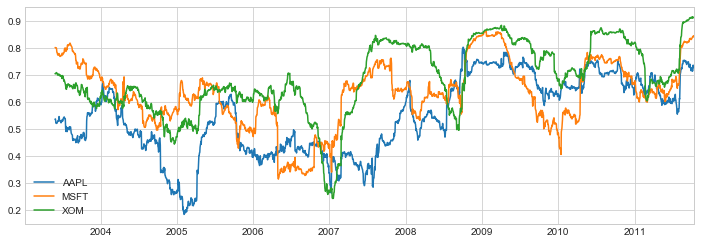

In [60]:
corr = returns.rolling(125, min_periods=100).corr(spx_rets)
corr.plot()

### User-defined moving window functions

배열의 각 조각으로부터 단일 값(감소 reduce 데이터의 개수를 줄임)을 반환해야 함 

rolling quantile 이동하면서 4분위 수를 구함 (다른구간은 구현해야함)

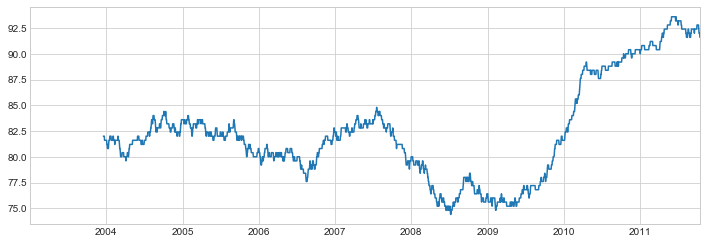

In [61]:
# 점수의 100분률을 구해주는 모듈 
from scipy.stats import percentileofscore

# 수익이 2%가 되는 때의 주가 250 일 이내에서 
score_at_2percent = lambda x: percentileofscore(x, 0.02)
result = returns.AAPL.rolling(window=250).apply(score_at_2percent)
result.plot()

## Performance and Memory Usage Notes

성능과 사용량 개선 

* pandas 의 노력
    - 기존 시계열에 대한 뷰 생성 (복제본을 만들지 않고.. 메모리낭비를 주림)
    - 하위 빈도 (일간 빈도 이상)에 대한 인덱스를 중앙캐시에 저장 <br>
        (월간 -> 년간 등으로 변경할때 캐시에서 인덱스를 추출하여 사용)
    - 데이터 정렬 연산과 리샘플링의 고도 최적화 

In [62]:
# 100분의 1초 간격으로 날짜를 만듬 
rng = pd.date_range('1/1/2000', periods=10000000, freq='10ms')

# 랜덤한 1000만개의 데이터 생성
ts = Series(np.random.randn(len(rng)), index=rng)
ts

2000-01-01 00:00:00.000    1.580830
2000-01-01 00:00:00.010    0.724509
2000-01-01 00:00:00.020    0.512687
2000-01-01 00:00:00.030   -0.628188
2000-01-01 00:00:00.040   -1.185817
2000-01-01 00:00:00.050    1.863995
                             ...   
2000-01-02 03:46:39.940    1.157004
2000-01-02 03:46:39.950    0.846840
2000-01-02 03:46:39.960   -1.320416
2000-01-02 03:46:39.970   -0.841942
2000-01-02 03:46:39.980   -0.427142
2000-01-02 03:46:39.990    0.366387
Freq: 10L, Length: 10000000, dtype: float64

In [63]:
# 다운샘플링.시가종가 (아직 실제 데이터가 만들어지는건 아님)
ts.resample('15min').ohlc().info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 112 entries, 2000-01-01 00:00:00 to 2000-01-02 03:45:00
Freq: 15T
Data columns (total 4 columns):
open     112 non-null float64
high     112 non-null float64
low      112 non-null float64
close    112 non-null float64
dtypes: float64(4)
memory usage: 4.4 KB


In [65]:
%timeit ts.resample('15min').ohlc()

10 loops, best of 3: 124 ms per loop


In [66]:
rng = pd.date_range('1/1/2000', periods=10000000, freq='1s')
ts = Series(np.random.randn(len(rng)), index=rng)
%timeit ts.resample('15s').ohlc()

1 loop, best of 3: 177 ms per loop
